## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1326, 20478)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1117, 25505)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [6]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

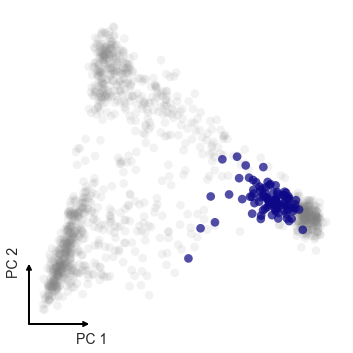

In [7]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['4']) # cones

In [8]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA2.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.1889
EMD: 0.3726
KLD: 0.3207
Knn Pres.: 59.8461
CPU times: user 2.17 s, sys: 764 ms, total: 2.93 s
Wall time: 2.99 s


CPU times: user 18.2 s, sys: 447 ms, total: 18.6 s
Wall time: 18.3 s


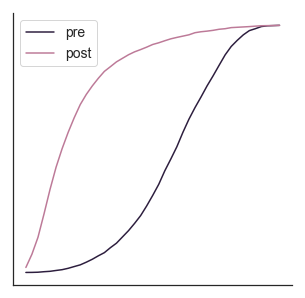

<Figure size 504x504 with 0 Axes>

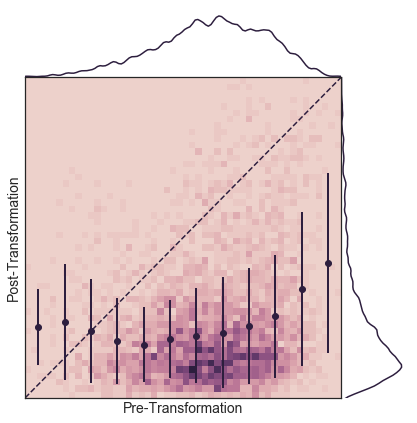

In [9]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

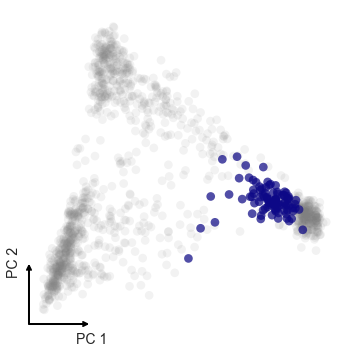

In [79]:
retina_PCA10 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=10)
retina_PCA10.plot_barcodes(ranks=['4']) # cones

In [80]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA10.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA10.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (10)'], final_distance_stats['Retina']['EMD']['PCA (10)'], final_distance_stats['Retina']['KLD']['PCA (10)'], final_distance_stats['Retina']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.2833
EMD: 0.2366
KLD: 0.156
Knn Pres.: 62.1548
CPU times: user 2.21 s, sys: 686 ms, total: 2.89 s
Wall time: 2.86 s


CPU times: user 18.7 s, sys: 539 ms, total: 19.3 s
Wall time: 19.5 s


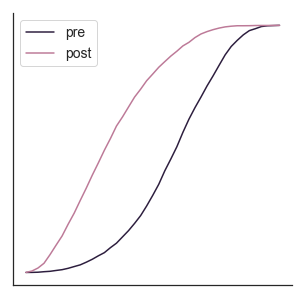

<Figure size 504x504 with 0 Axes>

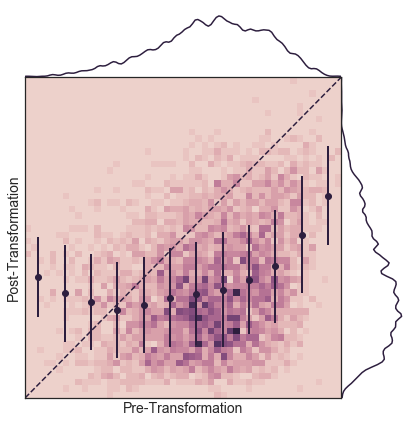

In [81]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

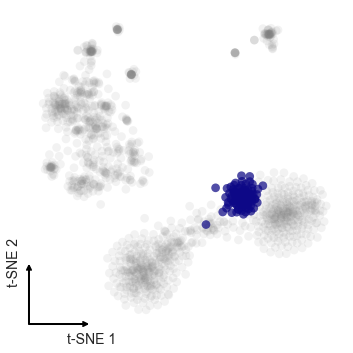

In [11]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['4']) # rods & cones

In [12]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_tSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.225
EMD: 0.3606
KLD: 0.1723
Knn Pres.: 64.0109
CPU times: user 2.15 s, sys: 658 ms, total: 2.81 s
Wall time: 2.84 s


CPU times: user 18.4 s, sys: 389 ms, total: 18.8 s
Wall time: 18.4 s


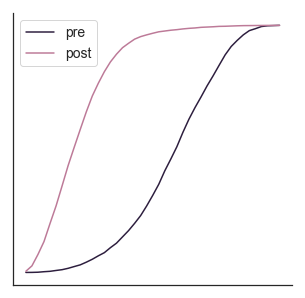

<Figure size 504x504 with 0 Axes>

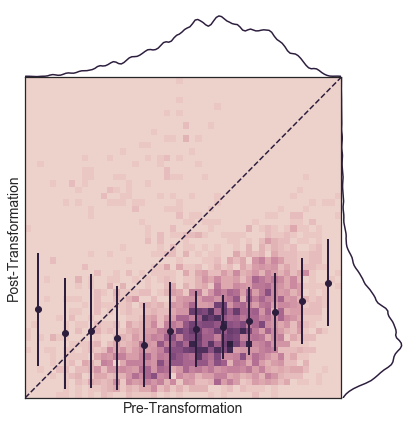

In [13]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

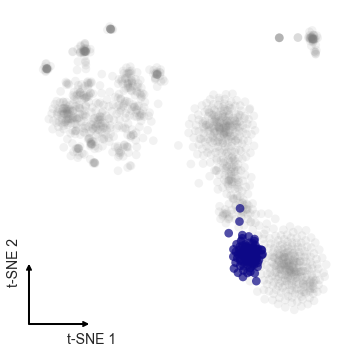

In [76]:
retina_FItSNE = DR.from_file('pymethods_out/retina_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_FItSNE.plot_barcodes(ranks=['4']) # rods & cones

In [77]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_FItSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_FItSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['FIt-SNE'], final_distance_stats['Retina']['EMD']['FIt-SNE'], final_distance_stats['Retina']['KLD']['FIt-SNE'], final_distance_stats['Retina']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2
EMD: 0.3671
KLD: 0.186
Knn Pres.: 64.2825
CPU times: user 2.31 s, sys: 850 ms, total: 3.16 s
Wall time: 3.15 s


CPU times: user 18.6 s, sys: 423 ms, total: 19 s
Wall time: 18.7 s


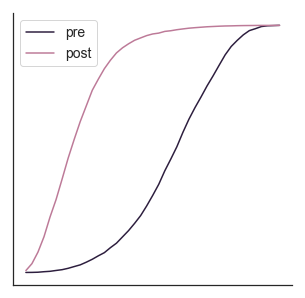

<Figure size 504x504 with 0 Axes>

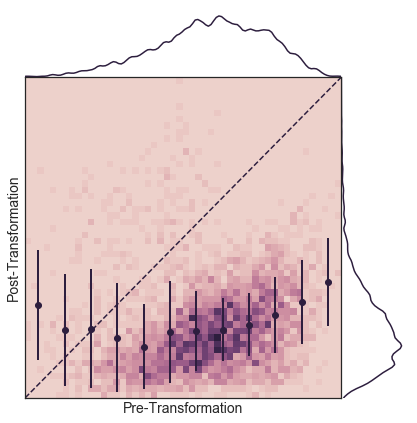

In [78]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

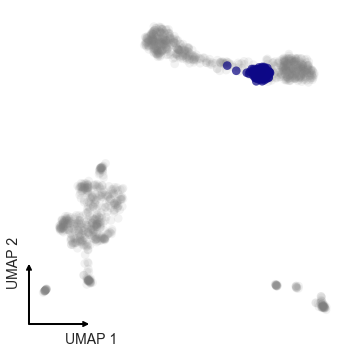

In [14]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['4']) # rods & cones

In [15]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_UMAP.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: -0.1511
EMD: 0.3991
KLD: 0.2995
Knn Pres.: 60.0272
CPU times: user 2.18 s, sys: 677 ms, total: 2.85 s
Wall time: 2.93 s


CPU times: user 18.9 s, sys: 532 ms, total: 19.4 s
Wall time: 19.5 s


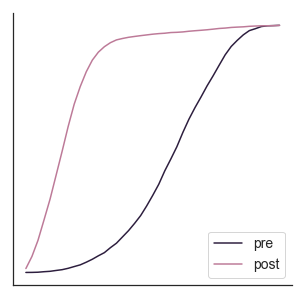

<Figure size 504x504 with 0 Axes>

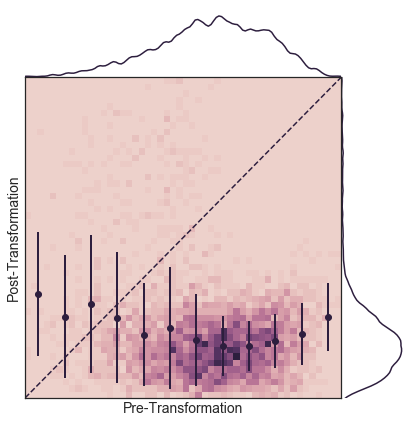

In [16]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

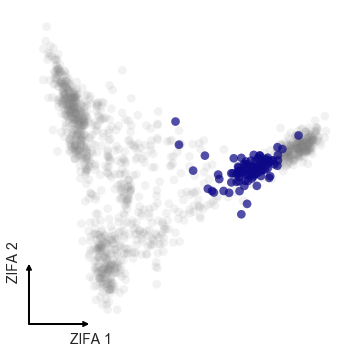

In [17]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['4']) # rods & cones

In [18]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_ZIFA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_ZIFA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.2845
EMD: 0.3781
KLD: 0.2737
Knn Pres.: 60.842
CPU times: user 2.45 s, sys: 1.01 s, total: 3.45 s
Wall time: 3.72 s


CPU times: user 18.6 s, sys: 414 ms, total: 19 s
Wall time: 18.9 s


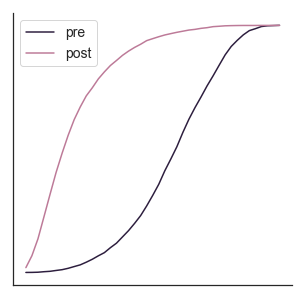

<Figure size 504x504 with 0 Axes>

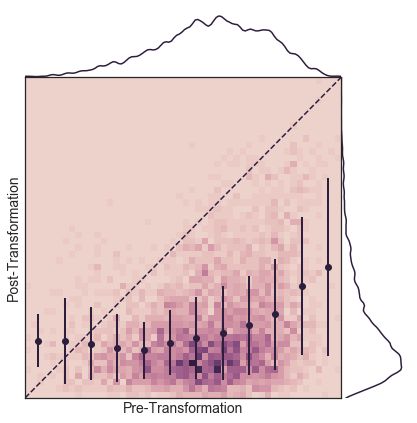

In [19]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

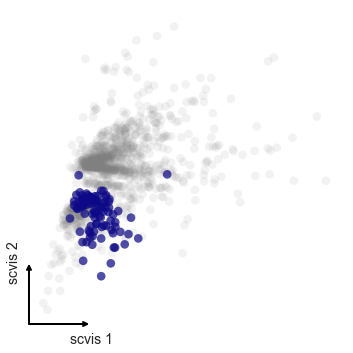

In [21]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['4']) # rods & cones

In [22]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scvis.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scvis.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8533
EMD: 0.0263
KLD: 0.1348
Knn Pres.: 86.0797
CPU times: user 1.33 s, sys: 384 ms, total: 1.71 s
Wall time: 1.74 s


CPU times: user 18.3 s, sys: 489 ms, total: 18.8 s
Wall time: 18.7 s


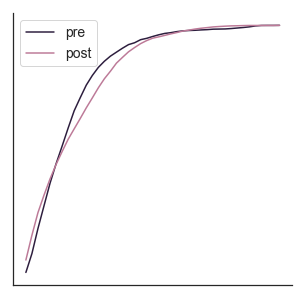

<Figure size 504x504 with 0 Axes>

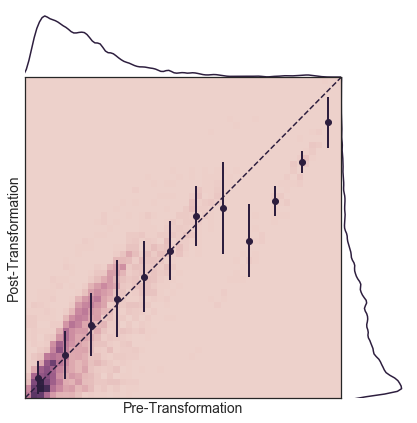

In [23]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

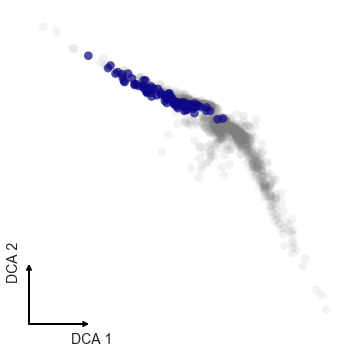

In [24]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_DCA.plot_barcodes(ranks=['4']) # rods & cones

In [25]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_DCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_DCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7754
EMD: 0.0364
KLD: 0.1664
Knn Pres.: 78.6555
CPU times: user 1.56 s, sys: 568 ms, total: 2.12 s
Wall time: 2.28 s


CPU times: user 18.3 s, sys: 420 ms, total: 18.7 s
Wall time: 18.5 s


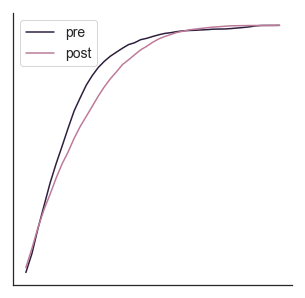

<Figure size 504x504 with 0 Axes>

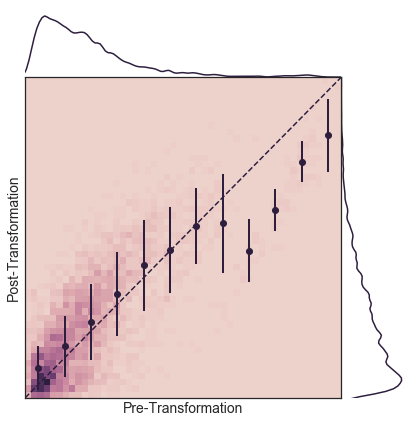

In [26]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

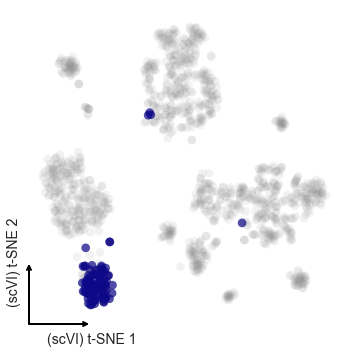

In [27]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['4']) # rods & cones

In [28]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scVI.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scVI.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.167
EMD: 0.2204
KLD: 0.3119
Knn Pres.: 60.6383
CPU times: user 1.35 s, sys: 385 ms, total: 1.74 s
Wall time: 1.76 s


CPU times: user 17.9 s, sys: 398 ms, total: 18.3 s
Wall time: 17.8 s


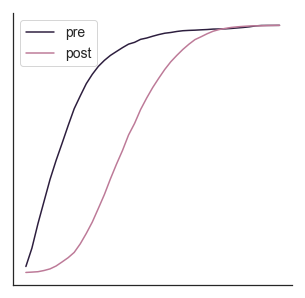

<Figure size 504x504 with 0 Axes>

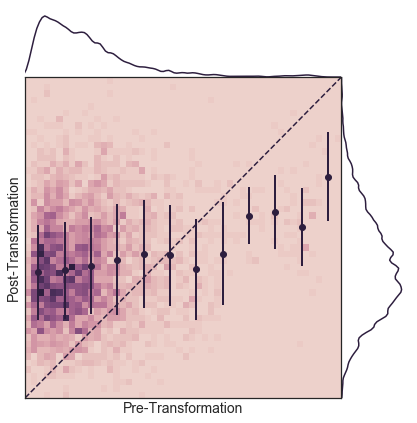

In [29]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

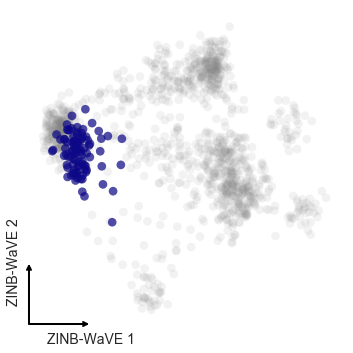

In [30]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['4']) # cones
retina_ZINBWAVE.plot_barcodes(ranks=['4'], figsize=(4,4), save_to='../images/cones_ZINBWAVE.png')

In [31]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_ZINBWAVE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINBWAVE'], final_distance_stats['Retina']['EMD']['ZINBWAVE'], final_distance_stats['Retina']['KLD']['ZINBWAVE'], final_distance_stats['Retina']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.171
EMD: 0.0504
KLD: 0.4123
Knn Pres.: 59.8234
CPU times: user 1.39 s, sys: 415 ms, total: 1.81 s
Wall time: 1.84 s


CPU times: user 18.1 s, sys: 448 ms, total: 18.6 s
Wall time: 18.3 s


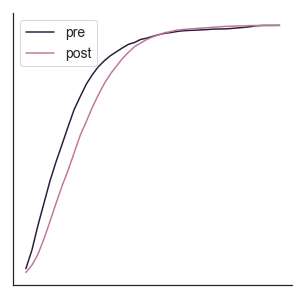

<Figure size 504x504 with 0 Axes>

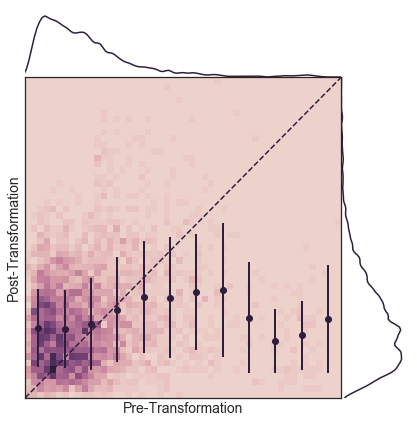

In [32]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

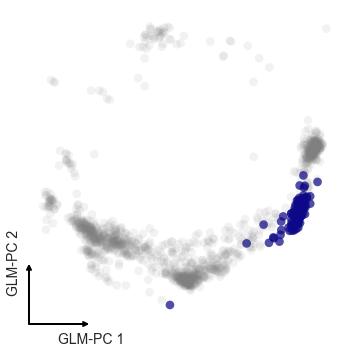

In [33]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['4']) # rods & cones

In [34]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_GLMPCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLMPCA'], final_distance_stats['Retina']['EMD']['GLMPCA'], final_distance_stats['Retina']['KLD']['GLMPCA'], final_distance_stats['Retina']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.212
EMD: 0.0747
KLD: 0.5125
Knn Pres.: 59.3481
CPU times: user 1.46 s, sys: 343 ms, total: 1.8 s
Wall time: 1.88 s


CPU times: user 17.9 s, sys: 411 ms, total: 18.4 s
Wall time: 17.9 s


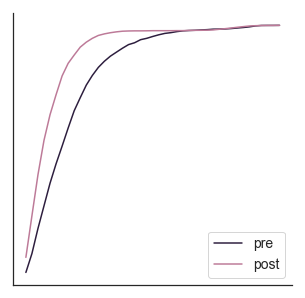

<Figure size 504x504 with 0 Axes>

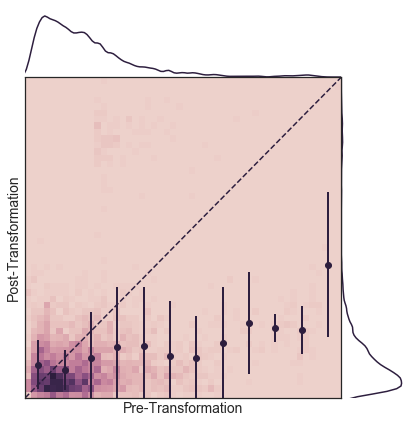

In [35]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

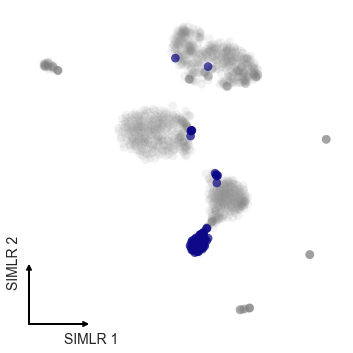

In [36]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_SIMLR.plot_barcodes(ranks=['4']) # rods & cones

In [37]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_SIMLR.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_SIMLR.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.3105
EMD: 0.0895
KLD: 0.6953
Knn Pres.: 75.6451
CPU times: user 1.41 s, sys: 373 ms, total: 1.78 s
Wall time: 1.78 s


CPU times: user 17.5 s, sys: 359 ms, total: 17.8 s
Wall time: 17.2 s


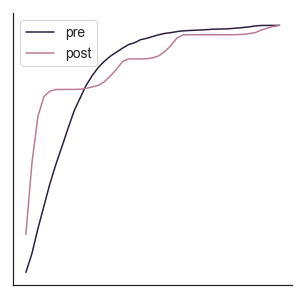

<Figure size 504x504 with 0 Axes>

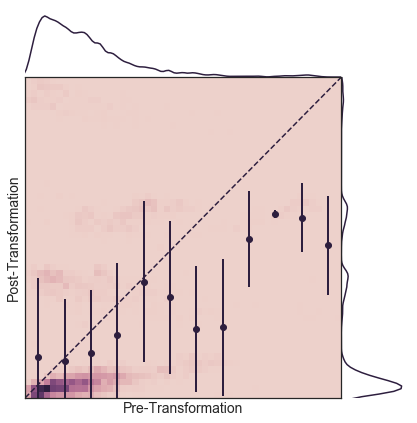

In [38]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

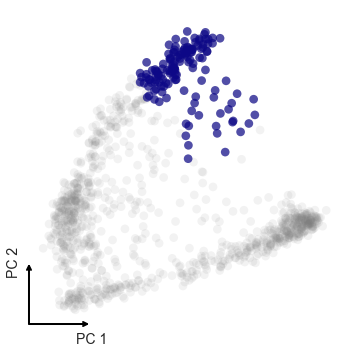

In [39]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3']) # mature goblet cells

In [40]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.3454
EMD: 0.1042
KLD: 0.2244
Knn Pres.: 74.9082
CPU times: user 4.74 s, sys: 1.59 s, total: 6.33 s
Wall time: 6.56 s


CPU times: user 18.5 s, sys: 433 ms, total: 19 s
Wall time: 18.6 s


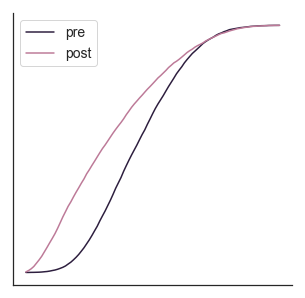

<Figure size 504x504 with 0 Axes>

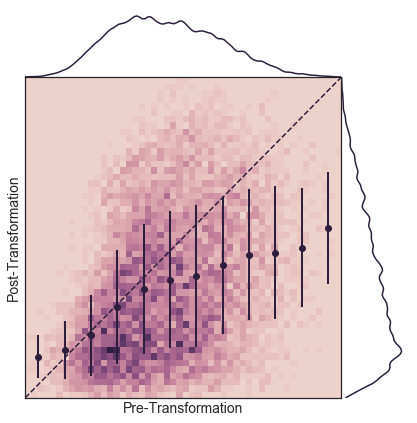

In [41]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

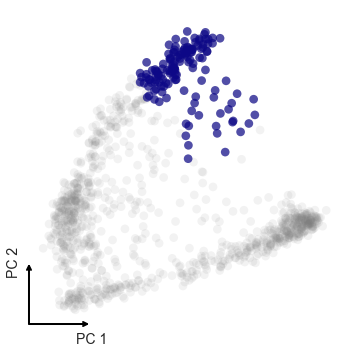

In [42]:
colon_PCA10 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=10)
colon_PCA10.plot_barcodes(ranks=['3']) # mature goblet cells

In [43]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA10.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA10.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (10)'], final_distance_stats['Colon']['EMD']['PCA (10)'], final_distance_stats['Colon']['KLD']['PCA (10)'], final_distance_stats['Colon']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.5156
EMD: 0.021
KLD: 0.0846
Knn Pres.: 76.4184
CPU times: user 4.64 s, sys: 1.51 s, total: 6.15 s
Wall time: 6.31 s


CPU times: user 18.6 s, sys: 507 ms, total: 19.1 s
Wall time: 19.8 s


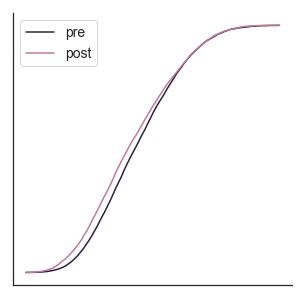

<Figure size 504x504 with 0 Axes>

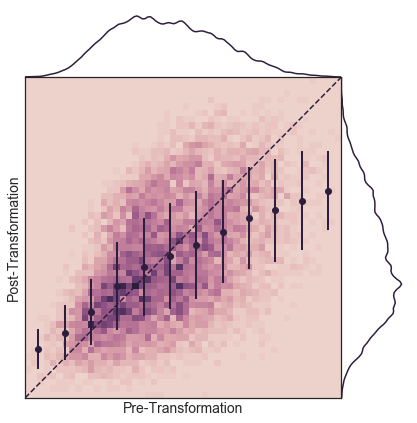

In [44]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

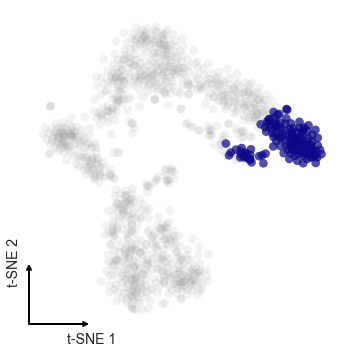

In [48]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [49]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3852
EMD: 0.0914
KLD: 0.1742
Knn Pres.: 75.8673
CPU times: user 4.56 s, sys: 1.52 s, total: 6.08 s
Wall time: 6.19 s


CPU times: user 18.5 s, sys: 420 ms, total: 19 s
Wall time: 18.7 s


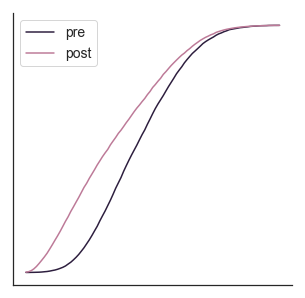

<Figure size 504x504 with 0 Axes>

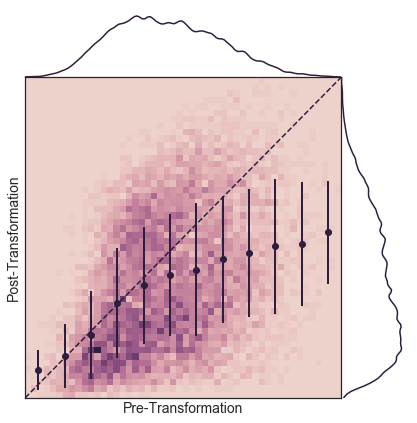

In [50]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

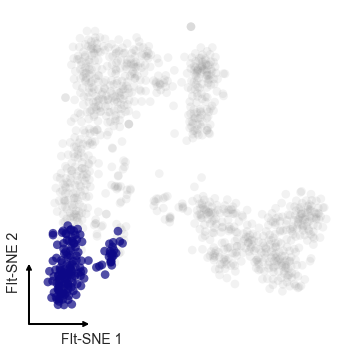

In [83]:
colon_FItSNE = DR.from_file('pymethods_out/colon_FItSNE.csv', name='FIt-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_FItSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [84]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_FItSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_FItSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['FIt-SNE'], final_distance_stats['Colon']['EMD']['FIt-SNE'], final_distance_stats['Colon']['KLD']['FIt-SNE'], final_distance_stats['Colon']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3527
EMD: 0.0995
KLD: 0.1922
Knn Pres.: 75.602
CPU times: user 4.52 s, sys: 1.39 s, total: 5.91 s
Wall time: 5.94 s


CPU times: user 19.3 s, sys: 451 ms, total: 19.7 s
Wall time: 19.7 s


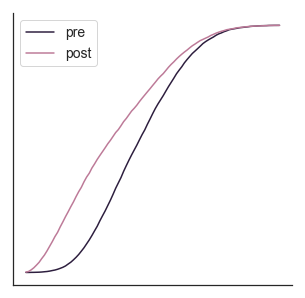

<Figure size 504x504 with 0 Axes>

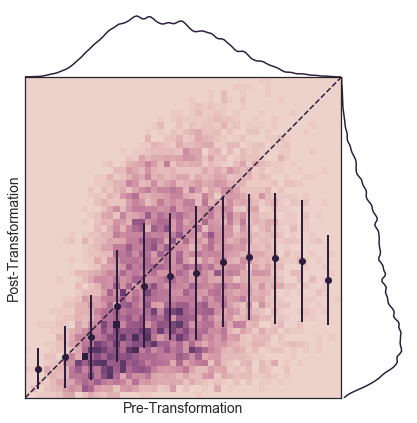

In [85]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

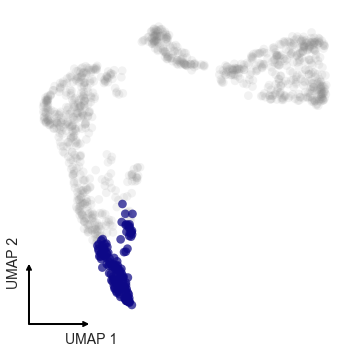

In [51]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [52]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.2202
EMD: 0.1298
KLD: 0.2694
Knn Pres.: 73.2959
CPU times: user 4.78 s, sys: 1.59 s, total: 6.37 s
Wall time: 6.47 s


CPU times: user 18.7 s, sys: 426 ms, total: 19.1 s
Wall time: 18.8 s


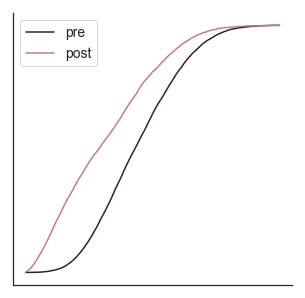

<Figure size 504x504 with 0 Axes>

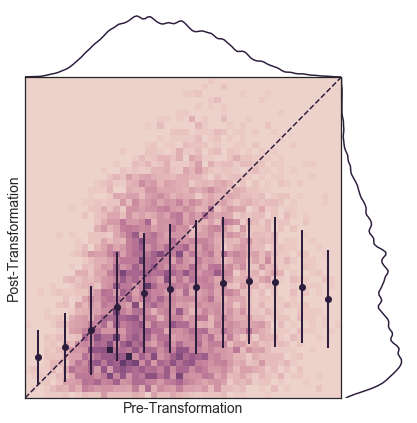

In [53]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

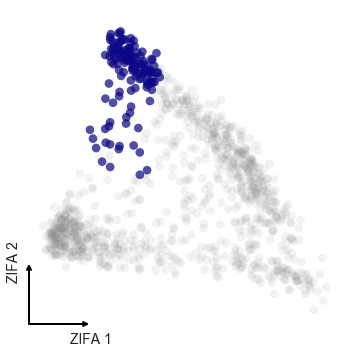

In [54]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_ZIFA.plot_barcodes(ranks=['3']) # mature goblet cells

In [55]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.3124
EMD: 0.1781
KLD: 0.2864
Knn Pres.: 73.8571
CPU times: user 4.7 s, sys: 1.58 s, total: 6.28 s
Wall time: 6.37 s


CPU times: user 18.7 s, sys: 601 ms, total: 19.3 s
Wall time: 19.7 s


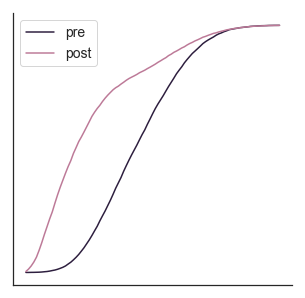

<Figure size 504x504 with 0 Axes>

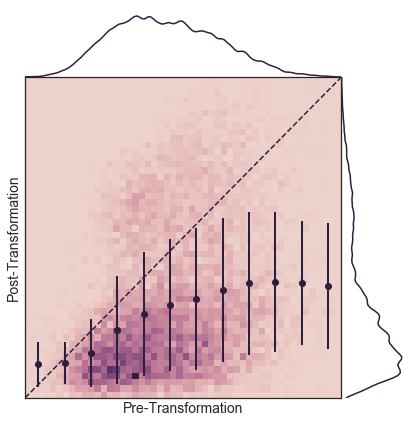

In [56]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

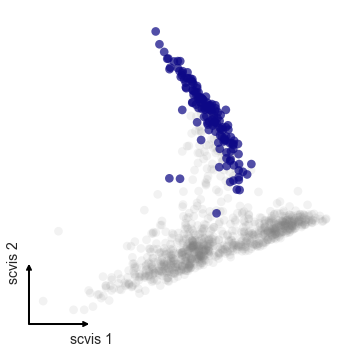

In [57]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/colon_clu.csv')
colon_scvis.plot_barcodes(ranks=['3']) # mature goblet cells

In [58]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8468
EMD: 0.0166
KLD: 0.0925
Knn Pres.: 88.7755
CPU times: user 3.97 s, sys: 1.22 s, total: 5.19 s
Wall time: 5.8 s


CPU times: user 18.5 s, sys: 521 ms, total: 19 s
Wall time: 19.9 s


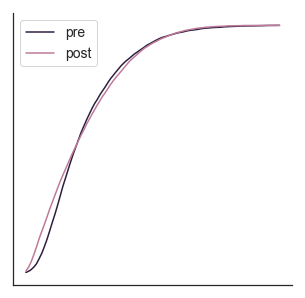

<Figure size 504x504 with 0 Axes>

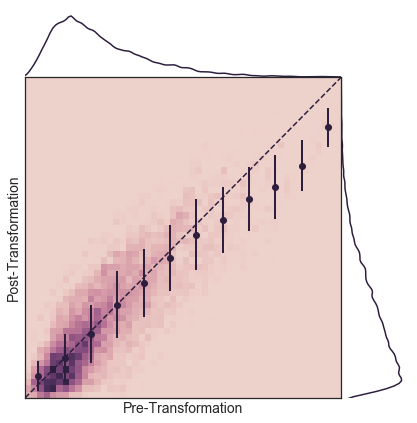

In [59]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

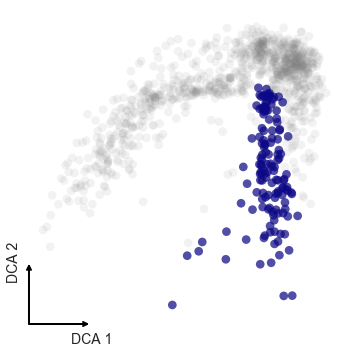

In [60]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_DCA.plot_barcodes(ranks=['3']) # mature goblet cells
colon_DCA.plot_barcodes(ranks=['3'], figsize=(4,4), save_to='../images/goblet_DCA.png')

In [61]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4726
EMD: 0.0376
KLD: 0.2602
Knn Pres.: 72.8469
CPU times: user 3.61 s, sys: 1.09 s, total: 4.69 s
Wall time: 4.7 s


CPU times: user 17.9 s, sys: 472 ms, total: 18.4 s
Wall time: 18 s


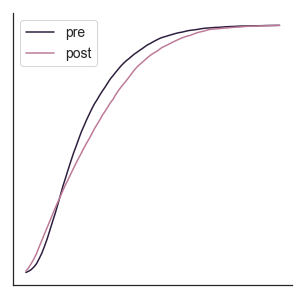

<Figure size 504x504 with 0 Axes>

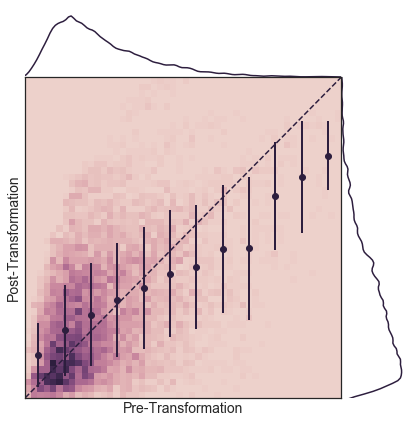

In [62]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

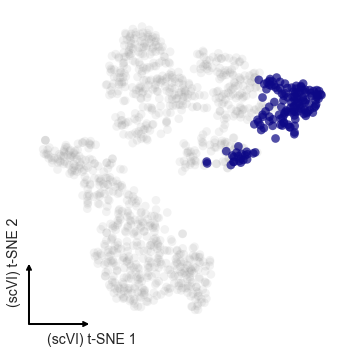

In [64]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [65]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.1946
EMD: 0.1646
KLD: 0.2312
Knn Pres.: 69.3878
CPU times: user 3.63 s, sys: 1.07 s, total: 4.7 s
Wall time: 4.76 s


CPU times: user 18.4 s, sys: 522 ms, total: 19 s
Wall time: 18.9 s


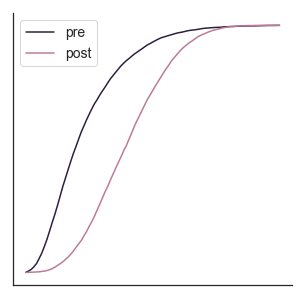

<Figure size 504x504 with 0 Axes>

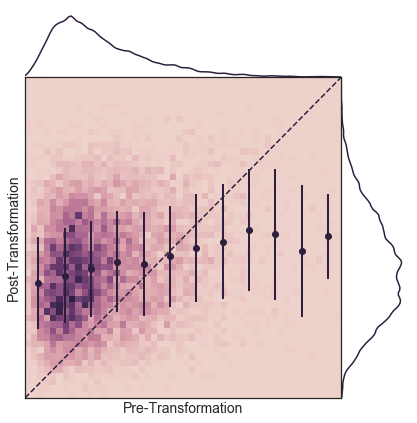

In [66]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

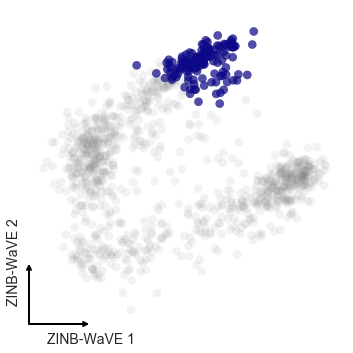

In [67]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3']) # mature goblet cells

In [68]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINBWAVE'], final_distance_stats['Colon']['EMD']['ZINBWAVE'], final_distance_stats['Colon']['KLD']['ZINBWAVE'], final_distance_stats['Colon']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2902
EMD: 0.0226
KLD: 0.2829
Knn Pres.: 70.1224
CPU times: user 3.95 s, sys: 1.2 s, total: 5.15 s
Wall time: 5.42 s


CPU times: user 18.1 s, sys: 373 ms, total: 18.5 s
Wall time: 17.9 s


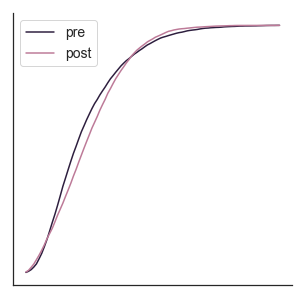

<Figure size 504x504 with 0 Axes>

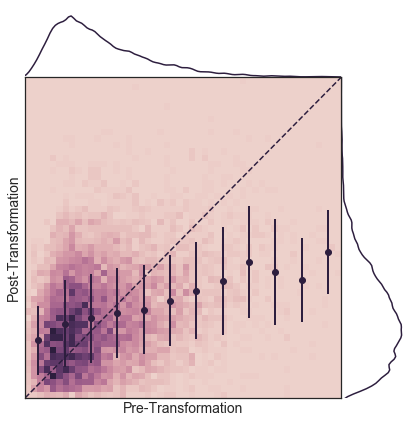

In [69]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

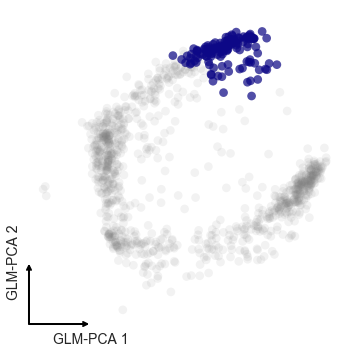

In [70]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv', name='GLM-PCA', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_GLMPCA.plot_barcodes(ranks=['3']) # mature goblet cells

In [71]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLMPCA'], final_distance_stats['Colon']['EMD']['GLMPCA'], final_distance_stats['Colon']['KLD']['GLMPCA'], final_distance_stats['Colon']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.169
EMD: 0.0268
KLD: 0.3573
Knn Pres.: 69.0714
CPU times: user 3.79 s, sys: 1.11 s, total: 4.89 s
Wall time: 4.9 s


CPU times: user 18.2 s, sys: 391 ms, total: 18.6 s
Wall time: 18.2 s


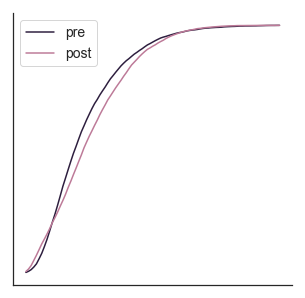

<Figure size 504x504 with 0 Axes>

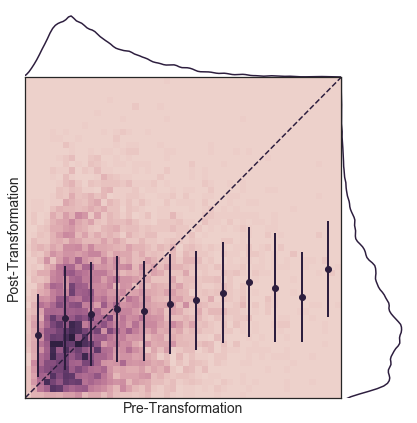

In [72]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

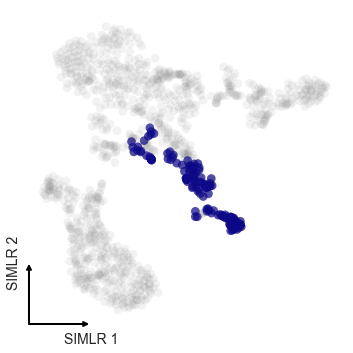

In [73]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_SIMLR.plot_barcodes(ranks=['3']) # mature goblet cells

In [74]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_SIMLR.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.2806
EMD: 0.1237
KLD: 0.3748
Knn Pres.: 74.0102
CPU times: user 3.85 s, sys: 1.14 s, total: 4.98 s
Wall time: 5.04 s


CPU times: user 18.5 s, sys: 400 ms, total: 18.9 s
Wall time: 18.5 s


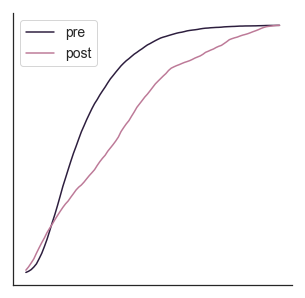

<Figure size 504x504 with 0 Axes>

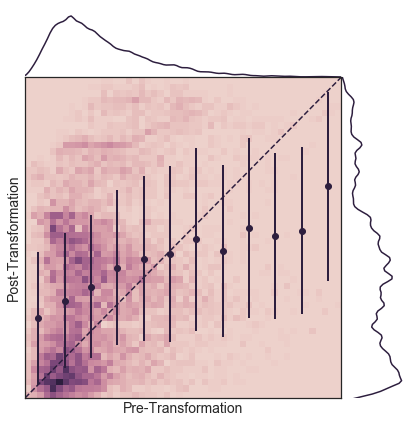

In [75]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
### Summary Metrics

In [87]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
retina_sum.to_csv('../retina_local_metrics.csv')

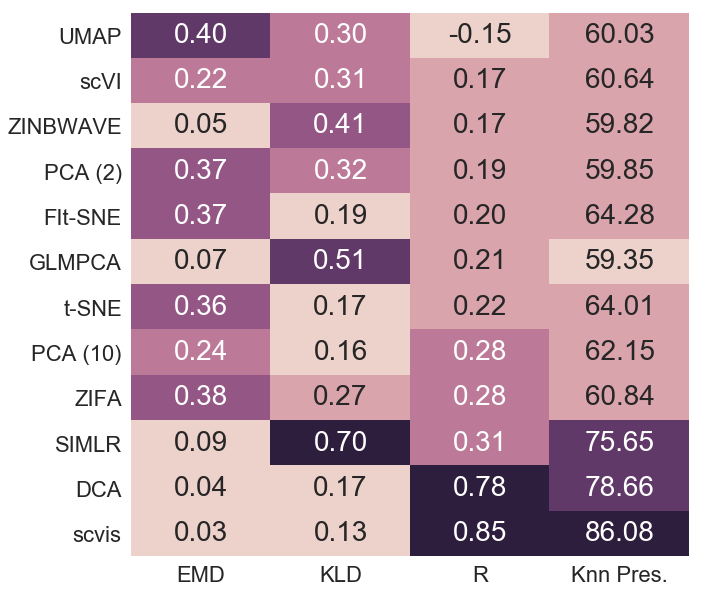

In [88]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
plt.savefig(fname='../images/retina_local_metrics.png', transparent=True, bbox_inches='tight')

In [89]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
colon_sum.to_csv('../colon_local_metrics.csv')

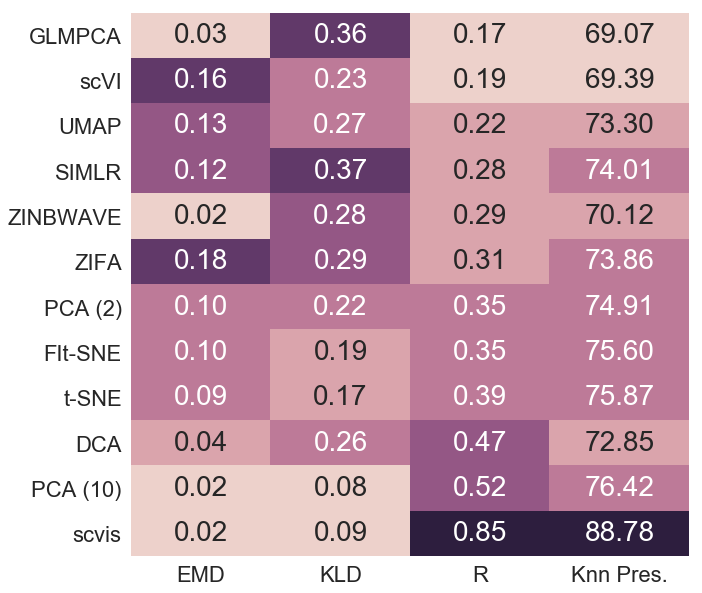

In [90]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
plt.savefig(fname='../images/colon_local_metrics.png', transparent=True, bbox_inches='tight')